<h1><center>Importing Libraries</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')

<h1><center>Problem 1</center></h1>
Consider the insurance.csv datafile. This file contains some basic demographic information 
related to an insurance company in the USA. In Python, answer the following:

In [2]:
#1a -  Using the pandas library, read the csv file and create a data-frame called insurance.

insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#1b - Using the appropriate Python commands, report the number of observations and variables.

insurance.shape

(1338, 7)

1338 observations & 7 variables

In [4]:
#1c - Using the appropriate Python commands, report the number of females and males in the insurance data-frame.

insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

676 males & 662 females

Text(0, 0.5, 'Frequency')

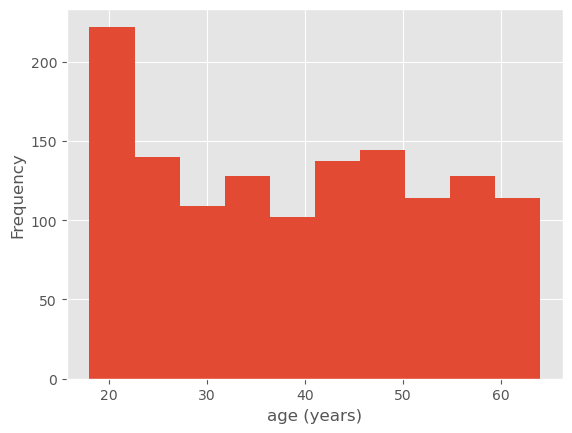

In [5]:
#1d - Create the histogram of age. Comment on the plot

insurance['age'].hist()
plt.xlabel('age (years)')
plt.ylabel('Frequency')

From the above, we see that there are much more people around 18-22 years old

In [6]:
#1e - A common hypothesis is that smokers insurance charges is higher than nonsmokers. 
# Compute the average charges for smokers and non-smokers. Does this calculation agree 
# with the initial hypothesis? Explain.

insurance.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

It agrees with the initial hypothesis since we see that people who smoke have almost 4 times the amount of charges compared to non-smokers

In [7]:
#1f - A common hypothesis is that smokers insurance charges is higher than nonsmokers. 
# Compute the median charges for smokers and non-smokers. 
# Does this calculation agree with the initial hypothesis? Explain.

insurance.groupby('smoker')['charges'].median()

smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64

This also agrees with the initial hypothesis since the people who smoke have over 4 times the amount of charges compared to non-smokers

In [24]:
#1g - Using the results from parts (e) and (f), what can you conclude about the 
# shape of the distributions of charges of smokers and non-smokers?

When the person isn't a smoker, the distribution is right-skewed since the mean is slightly larger than the median.<br>
When the person is a smoker, the distribution is left-skewed since the mean is slightly less than the median

<h1><center>Problem 2</center></h1>

Consider the Wisconsin breast cancer diagnostic data set.. The Wisconsin breast cancer data set contains
information on 569 biopsies, each with 32 features. One feature is an id number, another
is the cancer diagnosis, “M” to indicate malignant or “B” to indicate benign. The other 30
numeric measurements comprise the mean, standard error, and worst (that is, largest) value
for 10 different characteristics of the digitized cell nuclei. Notice that all these features are
related to the shape and size of the cell nuclei. In Python, answer the following:

In [25]:
#2a - Using the pandas library, read the csv file and create a data-frame called breast_cancer.

breast_cancer = pd.read_csv('wisconsin_breast_cancer(2).csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
#2b - Using the appropriate commands, report the number of B and M diagnoses

breast_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

From the above, there are 357 B and 212 M diagnoses

In [61]:
#2c - Using the appropriate commands, report the summary statistics of radius mean and area mean. 
# Comment on the shape of the distributions of radius mean and area mean. (Hint: compare the mean and median)

breast_cancer.describe()[['radius_mean', 'area_mean']]

,radius_mean,area_mean
count,569.000000,569.000000
mean,14.127292,654.889104
std,3.524049,351.914129
min,6.981000,143.500000
25%,11.700000,420.300000
50%,13.370000,551.100000
75%,15.780000,782.700000
max,28.110000,2501.000000


From the above:<br>
Radius mean is right-skewed since mean > Q2<br>
Area mean is right skewed since mean > Q2

In [53]:
#2d - Create two variables in the breast_cancer data-frame: one called z_radius_mean and another 
# one called z_area_mean that represent the z-score standardizations of radius_mean and area_mean

z_radius_mean = (breast_cancer['radius_mean'] - breast_cancer['radius_mean'].mean()) / breast_cancer['radius_mean'].std()
z_area_mean = (breast_cancer['area_mean'] - breast_cancer['area_mean'].mean()) / breast_cancer['area_mean'].std()

print('Radius mean z-score is ', z_radius_mean)
print('Area mean z-score is ', z_area_mean)

Radius mean z-score is  0      1.096100
1      1.828212
2      1.578499
3     -0.768233
4      1.748758
         ...   
564    2.109139
565    1.703356
566    0.701667
567    1.836725
568   -1.806811
Name: radius_mean, Length: 569, dtype: float64
Area mean z-score is  0      0.983510
1      1.907030
2      1.557513
3     -0.763792
4      1.824624
         ...   
564    2.341795
565    1.722326
566    0.577445
567    1.733693
568   -1.346604
Name: area_mean, Length: 569, dtype: float64


In [66]:
#Or you can do this for the same problem

from scipy import stats

z_radius_mean = stats.zscore(breast_cancer['radius_mean'])
z_area_mean = stats.zscore(breast_cancer['area_mean'])

print('Radius mean z-score is ', z_radius_mean)
print('Area mean z-score is ', z_area_mean)

Radius mean z-score is  0      1.097064
1      1.829821
2      1.579888
3     -0.768909
4      1.750297
         ...   
564    2.110995
565    1.704854
566    0.702284
567    1.838341
568   -1.808401
Name: radius_mean, Length: 569, dtype: float64
Area mean z-score is  0      0.984375
1      1.908708
2      1.558884
3     -0.764464
4      1.826229
         ...   
564    2.343856
565    1.723842
566    0.577953
567    1.735218
568   -1.347789
Name: area_mean, Length: 569, dtype: float64


In [67]:
#2e -  Report the five-number summary statistics of z_radius_mean and z_area_mean. 
# Are the any outliers in those two variables? Explain.

z_rd_mn_desc = z_radius_mean.describe()
z_ar_mn_desc = z_area_mean.describe()

print(z_rd_mn_desc, '\n')
print(z_ar_mn_desc)

count    5.690000e+02
mean    -1.373633e-16
std      1.000880e+00
min     -2.029648e+00
25%     -6.893853e-01
50%     -2.150816e-01
75%      4.693926e-01
max      3.971288e+00
Name: radius_mean, dtype: float64 

count    5.690000e+02
mean    -2.185325e-16
std      1.000880e+00
min     -1.454443e+00
25%     -6.671955e-01
50%     -2.951869e-01
75%      3.635073e-01
max      5.250529e+00
Name: area_mean, dtype: float64


From the above, we can assume there are outliers for both since the max is much larger than the mean

<h1><center>Problem 3</center></h1>

Answer the following using the data_science_job_salaries.csv data file

In [69]:
#3a - Using the pandas library, read the csv file and create a data-frame called ds_salary.

ds_salary = pd.read_csv('data_science_job_salaries.csv')
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,FT,Data Scientist,70000,EUR,79833,Germany,On-site,Germany,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,Hybrid,United Kingdom,M
3,2020,Mid,FT,Product Data Analyst,20000,USD,20000,Honduras,On-site,Honduras,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,United States,Hybrid,United States,L


In [77]:
#3b - Using the appropriate commands, report the top three job title labels in the job title variable.

top_three_titles = ds_salary['job_title'].value_counts().nlargest(3)
top_three_titles

job_title
Data Scientist    143
Data Engineer     132
Data Analyst       97
Name: count, dtype: int64

In [87]:
#3c - Using the appropriate commands, report the top five job titles with the
# highest average salaries (in USD). Hint: you might consider using groupby().

top_five_job_sal = ds_salary.groupby('job_title')['salary_in_usd'].mean().nlargest(5)
top_five_job_sal

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Name: salary_in_usd, dtype: float64

In [105]:
#3d - A common hypothesis these days is that data science employees who come to the office regularly,
# make more money. Using the appropriate commands, compute the average salary (in USD) based on remote
# ratio for US employees. Does this calculation agree with the initial hypothesis? Explain.

sal_remote = ds_salary.loc[ds_salary['employee_residence'] == 'United States'].groupby('remote_ratio')['salary_in_usd'].mean()
sal_remote

remote_ratio
Hybrid     139837.411765
On-site    141253.373134
Remote     151980.786290
Name: salary_in_usd, dtype: float64

From the above, we see that this is not true and those who work remotely actually make more $